In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import calendar

In [14]:
data=pd.read_csv('kerala_monthly.csv')
data_pre=pd.read_csv('preprocessed_data_new.csv')
data['Year']=data_pre['Date']
data['Year'] = pd.to_datetime(data['Year'])
data = data.rename(columns={'Year': 'Datestamp'})

In [16]:
data

,Datestamp,Month,Rain,T_max,T_min,Kerala_Trends,Kerala_Tourism,Kerala_Weather,Kerala_Travel,Kerala_Party,Geographic_Reference,Travel,Hotel,Air Travel,Bus & Rail,Car & Taxi Rental,Tourist Destinations,Travel Agencies,Tourist Arrivals
0,2010-01-01,Jan,6.8313,29.3500,15.4200,40,52,6,61,0,40,61,41,21,59,5,55,30,87553
1,2010-01-02,Feb,20.1979,31.7900,16.1100,34,55,7,53,0,34,53,32,13,55,4,48,31,86747
2,2010-01-03,Mar,66.8573,33.3100,18.4200,44,59,12,65,0,44,65,40,29,58,3,54,35,61334
3,2010-01-04,Apr,94.4786,33.7100,20.6200,31,54,9,59,6,31,59,33,14,59,0,54,29,50922
4,2010-01-05,May,112.6957,33.0600,19.1500,37,62,23,69,0,37,69,37,24,64,14,64,35,26783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-01-08,Aug,969.5651,29.9072,18.8279,20,3,27,25,1,20,25,9,19,32,2,19,2,1480642
152,2022-01-09,Sep,405.0702,30.1213,19.3321,17,4,17,26,1,17,26,10,16,32,2,22,3,1572294
153,2022-01-10,Oct,332.0119,29.6674,18.3958,18,4,17,28,1,18,27,11,20,35,2,24,3,1739286
154,2022-01-11,Nov,190.9530,28.8275,16.7351,17,4,18,32,1,17,31,11,16,30,2,23,3,1682632


In [17]:
data.columns.to_list()
final_cols=['Datestamp',
 'Month',
 'Rain',
 'T_max',
 'T_min',
 'Kerala_Trends',
 'Kerala_Tourism',
 'Kerala_Weather',
 'Kerala_Travel',
 'Kerala_Party',
 'Geographic_Reference',
 'Travel',
 'Hotel',
 'Air Travel',
 'Bus & Rail',
 'Car & Taxi Rental',
 'Tourist Destinations',
 'Travel Agencies', 'Tourist Arrivals' ]

In [18]:
data['Car & Taxi Rental']=data['Car & Taxi Rental'].replace('<1', 0.2 )
data['Car & Taxi Rental']=data['Car & Taxi Rental'].astype(float)
data['Kerala_Party']=data['Kerala_Party'].replace('<1', 0.3 )

data['Kerala_Party']=data['Kerala_Party'].astype(float)

In [19]:
data.head()

,Datestamp,Month,Rain,T_max,T_min,Kerala_Trends,Kerala_Tourism,Kerala_Weather,Kerala_Travel,Kerala_Party,Geographic_Reference,Travel,Hotel,Air Travel,Bus & Rail,Car & Taxi Rental,Tourist Destinations,Travel Agencies,Tourist Arrivals
0,2010-01-01,Jan,6.8313,29.35,15.42,40,52,6,61,0.0,40,61,41,21,59,5.0,55,30,87553
1,2010-01-02,Feb,20.1979,31.79,16.11,34,55,7,53,0.0,34,53,32,13,55,4.0,48,31,86747
2,2010-01-03,Mar,66.8573,33.31,18.42,44,59,12,65,0.0,44,65,40,29,58,3.0,54,35,61334
3,2010-01-04,Apr,94.4786,33.71,20.62,31,54,9,59,6.0,31,59,33,14,59,0.0,54,29,50922
4,2010-01-05,May,112.6957,33.06,19.15,37,62,23,69,0.0,37,69,37,24,64,14.0,64,35,26783


In [45]:
X=data[[
 'Rain',
 'T_max',
 'T_min',
 'Kerala_Trends',
 'Kerala_Tourism',
 'Kerala_Weather',
 'Kerala_Travel',
 'Kerala_Party',
 'Geographic_Reference',
 'Travel',
 'Hotel',
 'Air Travel',
 'Bus & Rail',
 'Car & Taxi Rental',
 'Tourist Destinations',
 'Travel Agencies']]


# remove ['Tourist Arrivals'] for just a feature matrix

In [46]:
data['Datestamp'] = pd.to_datetime(data['Datestamp'])

# Extract the year and month part as a string in the format 'YYYY-MM' and convert to a list
dates = data['Datestamp'].dt.strftime('%Y-%m').to_list()


print(dates)

['2010-01', '2010-01', '2010-01', '2010-01', '2010-01', '2010-01', '2010-01', '2010-01', '2010-01', '2010-01', '2010-01', '2010-01', '2011-01', '2011-01', '2011-01', '2011-01', '2011-01', '2011-01', '2011-01', '2011-01', '2011-01', '2011-01', '2011-01', '2011-01', '2012-01', '2012-01', '2012-01', '2012-01', '2012-01', '2012-01', '2012-01', '2012-01', '2012-01', '2012-01', '2012-01', '2012-01', '2013-01', '2013-01', '2013-01', '2013-01', '2013-01', '2013-01', '2013-01', '2013-01', '2013-01', '2013-01', '2013-01', '2013-01', '2014-01', '2014-01', '2014-01', '2014-01', '2014-01', '2014-01', '2014-01', '2014-01', '2014-01', '2014-01', '2014-01', '2014-01', '2015-01', '2015-01', '2015-01', '2015-01', '2015-01', '2015-01', '2015-01', '2015-01', '2015-01', '2015-01', '2015-01', '2015-01', '2016-01', '2016-01', '2016-01', '2016-01', '2016-01', '2016-01', '2016-01', '2016-01', '2016-01', '2016-01', '2016-01', '2016-01', '2017-01', '2017-01', '2017-01', '2017-01', '2017-01', '2017-01', '2017-01'

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()

# Fit and transform the data matrix to normalize each column
last_column_name = X.columns[-1]

X[last_column_name] = X[last_column_name] / 100000

# Reshape the last_column to a 2D array (required by StandardScaler)


# Normalize the last column

# If you want to replace the original values in X with the normalized values


similarities=cosine_similarity(X)





<ipython-input-47-87f263460455>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[last_column_name] = X[last_column_name] / 100000


In [48]:
X

,Rain,T_max,T_min,Kerala_Trends,Kerala_Tourism,Kerala_Weather,Kerala_Travel,Kerala_Party,Geographic_Reference,Travel,Hotel,Air Travel,Bus & Rail,Car & Taxi Rental,Tourist Destinations,Travel Agencies
0,6.8313,29.3500,15.4200,40,52,6,61,0.0,40,61,41,21,59,5.0,55,0.00030
1,20.1979,31.7900,16.1100,34,55,7,53,0.0,34,53,32,13,55,4.0,48,0.00031
2,66.8573,33.3100,18.4200,44,59,12,65,0.0,44,65,40,29,58,3.0,54,0.00035
3,94.4786,33.7100,20.6200,31,54,9,59,6.0,31,59,33,14,59,0.0,54,0.00029
4,112.6957,33.0600,19.1500,37,62,23,69,0.0,37,69,37,24,64,14.0,64,0.00035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,969.5651,29.9072,18.8279,20,3,27,25,1.0,20,25,9,19,32,2.0,19,0.00002
152,405.0702,30.1213,19.3321,17,4,17,26,1.0,17,26,10,16,32,2.0,22,0.00003
153,332.0119,29.6674,18.3958,18,4,17,28,1.0,18,27,11,20,35,2.0,24,0.00003
154,190.9530,28.8275,16.7351,17,4,18,32,1.0,17,31,11,16,30,2.0,23,0.00003


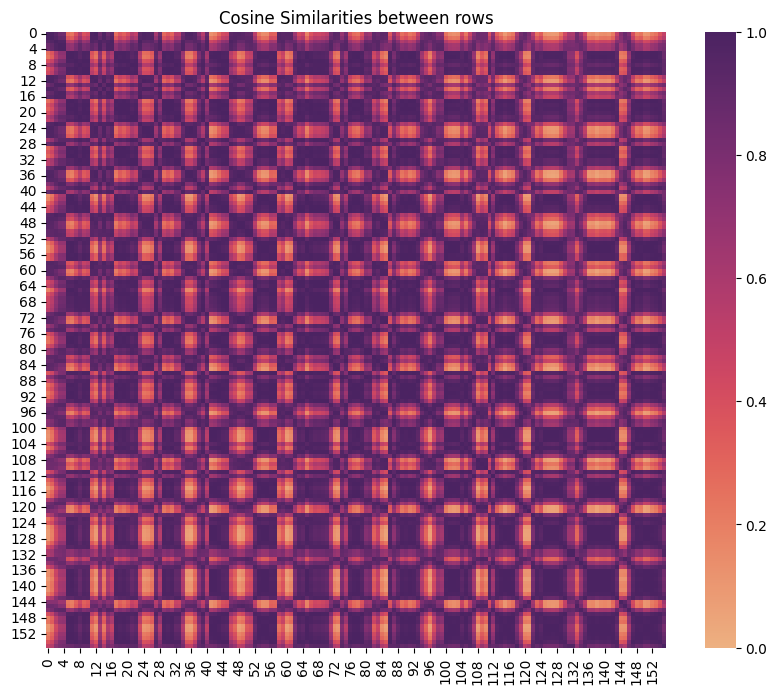

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(similarities, cmap='flare', vmin=0, vmax=1)
plt.title('Cosine Similarities between rows')
plt.show()

In [50]:
data_pre

,Date,Rain,T_max,T_min,Kerala_Trends,Kerala_Tourism,Kerala_Weather,Kerala_Travel,Recreation,Geographic_Reference,Travel,Hotel,Air Travel,Bus & Rail,Car & Taxi Rental,Tourist Destinations,Travel Agencies,Tourist Arrivals,Formatted_Date,Cluster_ID
0,2010-01-01,-0.866119,-0.828886,-1.848258,3.040989,2.547672,-0.891865,2.468694,0,3.040989,2.460477,3.003711,0.085313,1.975207,5,2.130383,2.575467,94966.000,Jan'10,0
1,2010-02-01,-0.814907,0.659512,-1.413850,2.161667,2.756409,-0.793260,1.785864,0,2.161667,1.778408,1.901172,-0.809393,1.617018,4,1.556252,2.698937,94185.000,Feb'10,0
2,2010-03-01,-0.636138,1.586710,0.040471,3.627204,3.034726,-0.300238,2.810109,0,3.627204,2.801511,2.881206,0.980018,1.885659,3,2.048364,3.192819,66854.000,Mar'10,1
3,2010-04-01,-0.530310,1.830709,1.425539,1.722006,2.686830,-0.596051,2.297986,6,1.722006,2.289959,2.023676,-0.697555,1.975207,0,2.048364,2.451996,57215.000,Apr'10,1
4,2010-05-01,-0.460514,1.434210,0.500062,2.601328,3.243464,0.784411,3.151524,0,2.601328,3.142546,2.513694,0.420827,2.422943,14,2.868551,3.192819,28938.000,May'10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-08-01,2.822461,-0.488994,0.297275,0.109915,-0.861712,1.178829,-0.604042,1,0.109915,-0.608834,-0.916426,-0.138364,-0.442570,2,-0.822290,-0.881706,1050706.820,Aug'22,4
152,2022-09-01,0.659678,-0.358393,0.614708,-0.329746,-0.792133,0.192784,-0.518688,1,-0.329746,-0.523575,-0.793922,-0.473879,-0.442570,2,-0.576234,-0.758235,1142729.205,Sep'22,4
153,2022-10-01,0.379765,-0.635272,0.025236,-0.183192,-0.792133,0.192784,-0.347981,1,-0.183192,-0.438317,-0.671418,-0.026526,-0.173928,2,-0.412197,-0.758235,1289798.330,Oct'22,2
154,2022-11-01,-0.160682,-1.147610,-1.020302,-0.329746,-0.792133,0.291389,-0.006566,1,-0.329746,-0.097282,-0.671418,-0.473879,-0.621665,2,-0.494215,-0.758235,1299918.709,Nov'22,3


In [51]:



data_pre['Date'] = pd.to_datetime(data_pre['Date'], format='%d-%m-%Y')

# Convert the datetime objects to the desired format
data_pre['Formatted_Date'] = data_pre['Date'].dt.strftime("%b'%y")

# Extract the formatted dates as a list
dates = data_pre['Formatted_Date'].tolist()
dates





["Jan'10",
 "Feb'10",
 "Mar'10",
 "Apr'10",
 "May'10",
 "Jun'10",
 "Jul'10",
 "Aug'10",
 "Sep'10",
 "Oct'10",
 "Nov'10",
 "Dec'10",
 "Jan'11",
 "Feb'11",
 "Mar'11",
 "Apr'11",
 "May'11",
 "Jun'11",
 "Jul'11",
 "Aug'11",
 "Sep'11",
 "Oct'11",
 "Nov'11",
 "Dec'11",
 "Jan'12",
 "Feb'12",
 "Mar'12",
 "Apr'12",
 "May'12",
 "Jun'12",
 "Jul'12",
 "Aug'12",
 "Sep'12",
 "Oct'12",
 "Nov'12",
 "Dec'12",
 "Jan'13",
 "Feb'13",
 "Mar'13",
 "Apr'13",
 "May'13",
 "Jun'13",
 "Jul'13",
 "Aug'13",
 "Sep'13",
 "Oct'13",
 "Nov'13",
 "Dec'13",
 "Jan'14",
 "Feb'14",
 "Mar'14",
 "Apr'14",
 "May'14",
 "Jun'14",
 "Jul'14",
 "Aug'14",
 "Sep'14",
 "Oct'14",
 "Nov'14",
 "Dec'14",
 "Jan'15",
 "Feb'15",
 "Mar'15",
 "Apr'15",
 "May'15",
 "Jun'15",
 "Jul'15",
 "Aug'15",
 "Sep'15",
 "Oct'15",
 "Nov'15",
 "Dec'15",
 "Jan'16",
 "Feb'16",
 "Mar'16",
 "Apr'16",
 "May'16",
 "Jun'16",
 "Jul'16",
 "Aug'16",
 "Sep'16",
 "Oct'16",
 "Nov'16",
 "Dec'16",
 "Jan'17",
 "Feb'17",
 "Mar'17",
 "Apr'17",
 "May'17",
 "Jun'17",
 "Jul'17",

In [98]:
threshold = 0.99  # Adjust this threshold as needed

# Find indices where similarity is above the threshold
similar_indices = np.argwhere(similarities > threshold)

# Initialize a dictionary to store similar dates
similar_dates = {}

# Iterate through the indices and populate the dictionary
for i, j in similar_indices:
    if i != j:
        date_i = dates[i]
        date_j = dates[j]

        if date_i not in similar_dates:
            similar_dates[date_i] = [date_j]
        else:
            similar_dates[date_i].append(date_j)

# Print similar dates

for date, similar_list in similar_dates.items():
    print(f"Dates similar to {date}: {similar_list}")

similar_dates_dict = {}
for date, similar_list in similar_dates.items():
    similar_dates_dict[date] = similar_list

# Print the resulting dictionary
print(similar_dates_dict)

Dates similar to Jan'10: ["Feb'10", "Jan'11"]
Dates similar to Feb'10: ["Jan'10"]
Dates similar to Mar'10: ["May'11", "Dec'11"]
Dates similar to Apr'10: ["May'10", "Feb'11", "Apr'11"]
Dates similar to May'10: ["Apr'10"]
Dates similar to Jun'10: ["Jul'10", "Aug'10", "Oct'10", "Jun'11", "Jul'11", "Aug'11", "Jun'12", "Jul'12", "Aug'12", "Jul'13", "Aug'13", "Jun'14", "Jul'14", "Aug'14", "Sep'14", "Oct'14", "Jun'15", "Jun'16", "Jul'16", "Jun'17", "Aug'17", "Sep'17", "May'18", "Oct'18", "Jul'19", "Sep'19", "Oct'19", "May'22", "Jun'22", "Sep'22", "Oct'22"]
Dates similar to Jul'10: ["Jun'10", "Jun'11", "Aug'11", "Jun'12", "Aug'12", "Jun'13", "Jul'13", "Aug'13", "Jun'14", "Jul'14", "Aug'14", "Sep'14", "Oct'14", "Jun'15", "Jun'16", "Jul'16", "Jun'17", "Aug'17", "Sep'17", "May'18", "Jun'18", "Jul'18", "Oct'18", "Jul'19", "Sep'19", "Oct'19", "Jun'20", "May'21", "Jun'21", "Aug'21", "Sep'21", "Oct'21", "May'22", "Jun'22", "Jul'22", "Aug'22", "Sep'22", "Oct'22"]
Dates similar to Aug'10: ["Jun'10", "O

In [87]:
similarities

array([[1.        , 0.99003453, 0.937402  , ..., 0.24645601, 0.37559382,
        0.4982613 ],
       [0.99003453, 1.        , 0.96363853, ..., 0.34104723, 0.46321252,
        0.5555387 ],
       [0.937402  , 0.96363853, 1.        , ..., 0.56132208, 0.66639255,
        0.74263024],
       ...,
       [0.24645601, 0.34104723, 0.56132208, ..., 1.        , 0.98808438,
        0.88737897],
       [0.37559382, 0.46321252, 0.66639255, ..., 0.98808438, 1.        ,
        0.92525179],
       [0.4982613 , 0.5555387 , 0.74263024, ..., 0.88737897, 0.92525179,
        1.        ]])

In [88]:
threshold2 = 0.98  # Adjust this threshold as needed

# Find indices where similarity is above the threshold
similar_indices = np.argwhere(similarities > threshold2)

# Initialize a dictionary to store similar dates
# similar_dates = {}

# Iterate through the indices and populate the dictionary
for i, j in similar_indices:
    if i != j:
        date_i = dates[i]
        date_j = dates[j]

        if date_i not in similar_dates:
            similar_dates[date_i] = [date_j]
        else:
            similar_dates[date_i].append(date_j)

# Print similar dates

for date, similar_list in similar_dates.items():
    print(f"Dates similar to {date}: {similar_list}")

similar_dates_dict = {}
for date, similar_list in similar_dates.items():
    similar_dates_dict[date] = similar_list

# Print the resulting dictionary
print(similar_dates_dict)

Dates similar to Jan'10: ["Feb'10", "Jan'11", "Feb'10", "Jan'11", "Jan'12"]
Dates similar to Feb'10: ["Jan'10", "Jan'10", "Dec'10", "Jan'11", "Mar'11"]
Dates similar to Mar'10: ["May'11", "Dec'11", "May'11", "Dec'11"]
Dates similar to Apr'10: ["May'10", "Feb'11", "Apr'11", "May'10", "Feb'11", "Apr'11", "May'11", "May'12", "Nov'12"]
Dates similar to May'10: ["Apr'10", "Apr'10", "Feb'11", "Apr'11", "May'12"]
Dates similar to Jun'10: ["Jul'10", "Aug'10", "Oct'10", "Jun'11", "Jul'11", "Aug'11", "Jun'12", "Jul'12", "Aug'12", "Jul'13", "Aug'13", "Jun'14", "Jul'14", "Aug'14", "Sep'14", "Oct'14", "Jun'15", "Jun'16", "Jul'16", "Jun'17", "Aug'17", "Sep'17", "May'18", "Oct'18", "Jul'19", "Sep'19", "Oct'19", "May'22", "Jun'22", "Sep'22", "Oct'22", "Jul'10", "Aug'10", "Oct'10", "Nov'10", "Jun'11", "Jul'11", "Aug'11", "Sep'11", "Jun'12", "Jul'12", "Aug'12", "Jun'13", "Jul'13", "Aug'13", "Sep'13", "Jun'14", "Jul'14", "Aug'14", "Sep'14", "Oct'14", "Jun'15", "Jul'15", "May'16", "Jun'16", "Jul'16", "Aug

In [120]:
non_similar_indices = np.argwhere(similarities <= threshold)
non_similar_indices

array([[  0,   2],
       [  0,   3],
       [  0,   4],
       ...,
       [155, 152],
       [155, 153],
       [155, 154]])

In [144]:
len(partition)

156

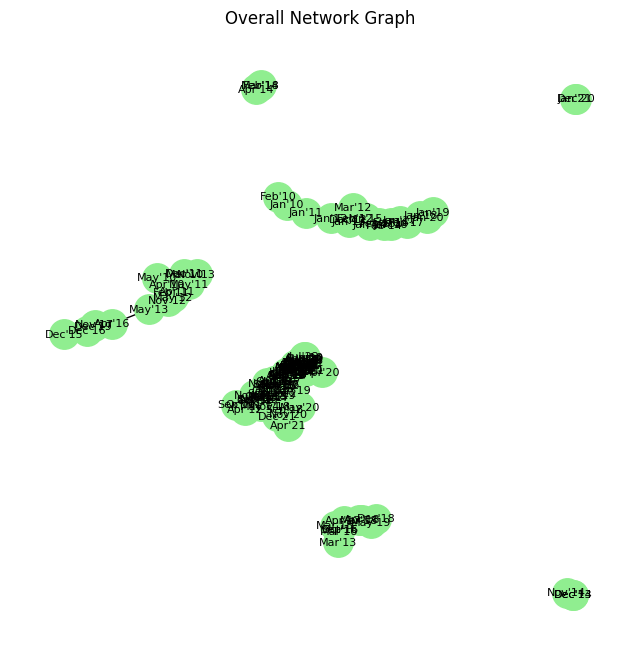

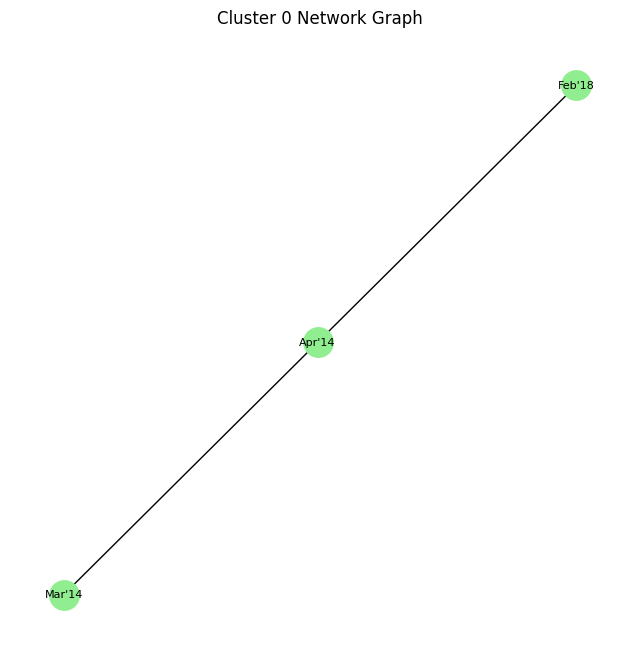

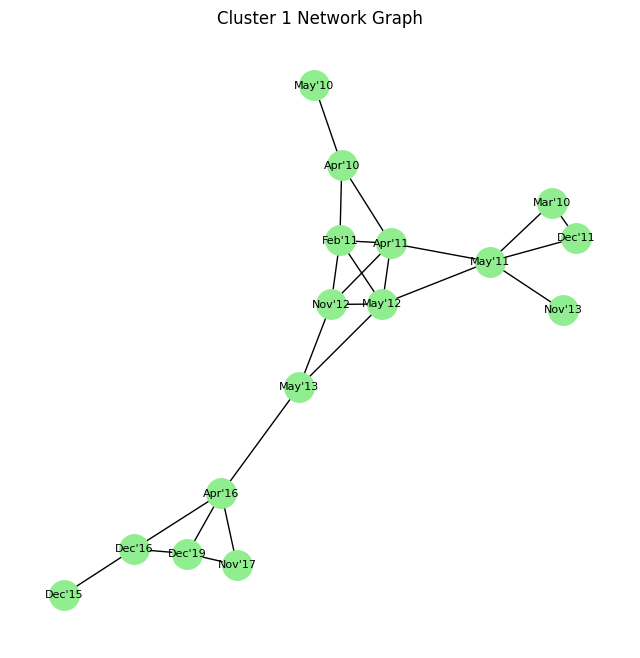

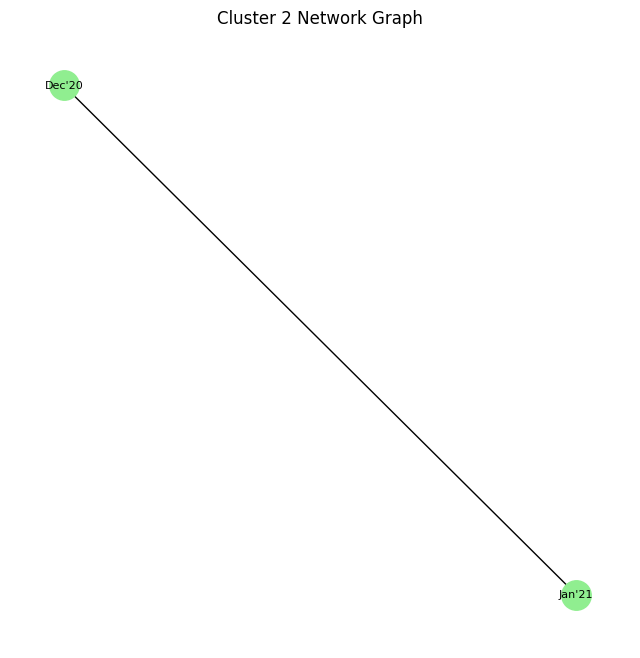

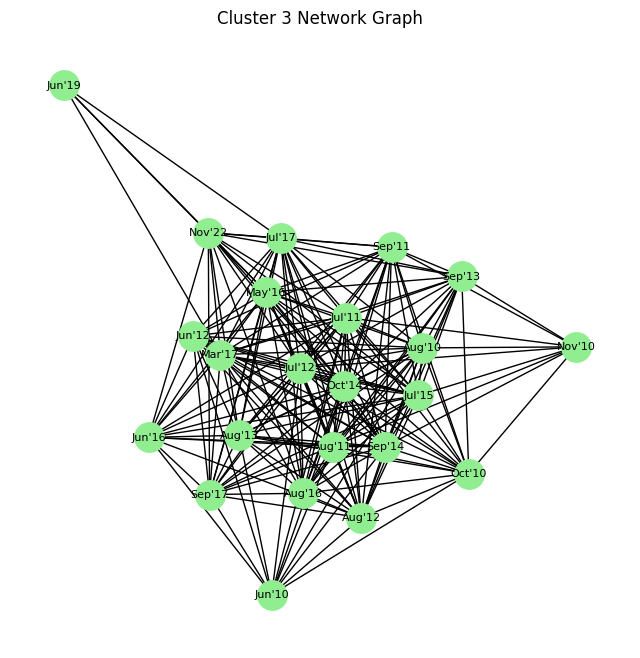

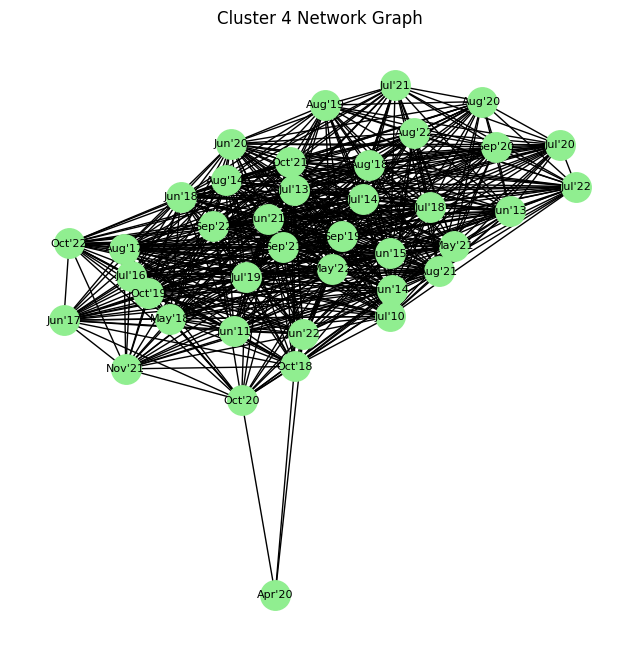

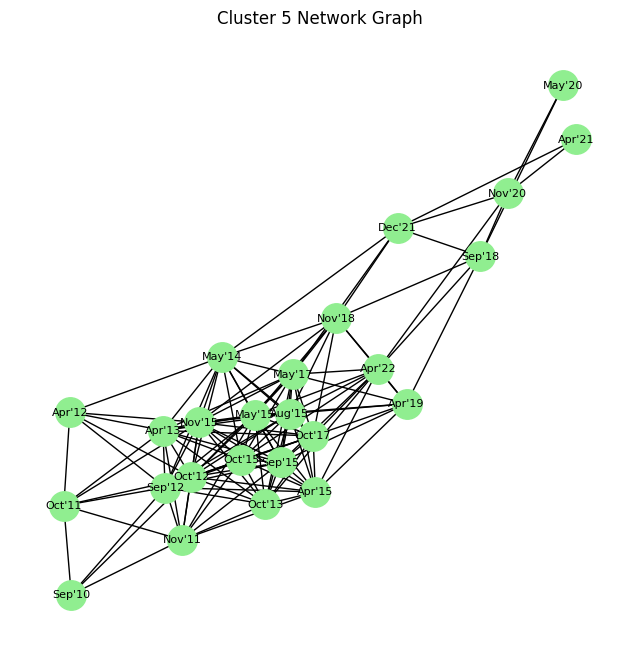

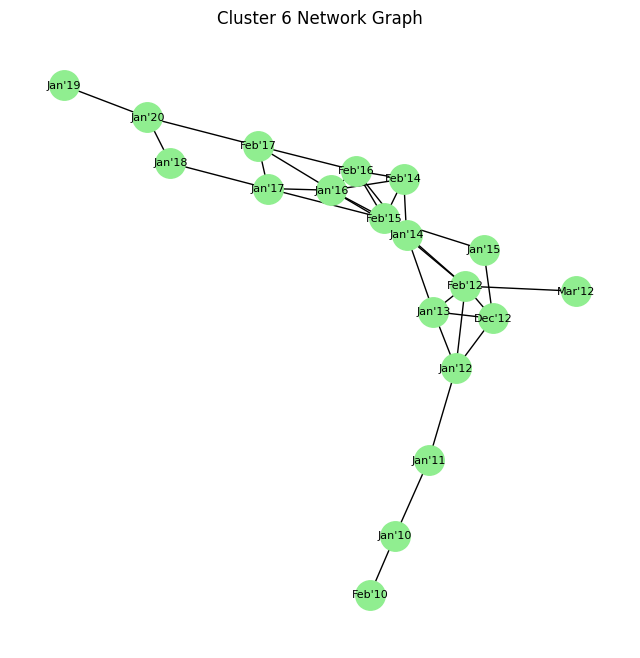

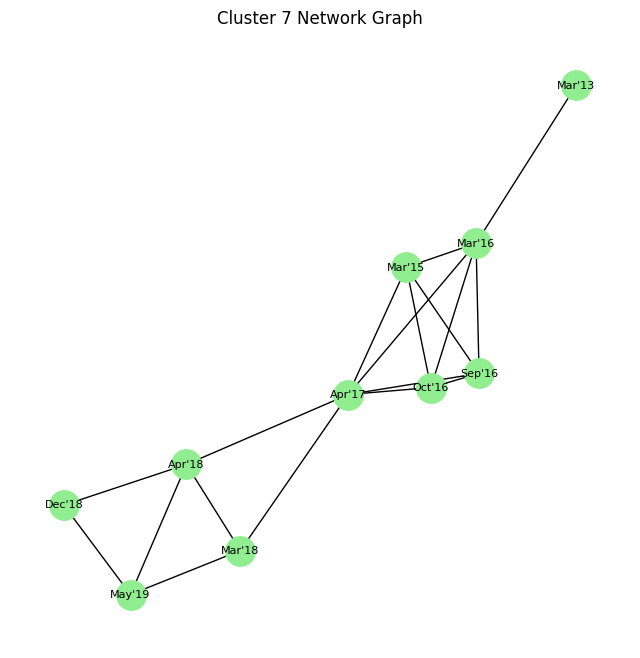

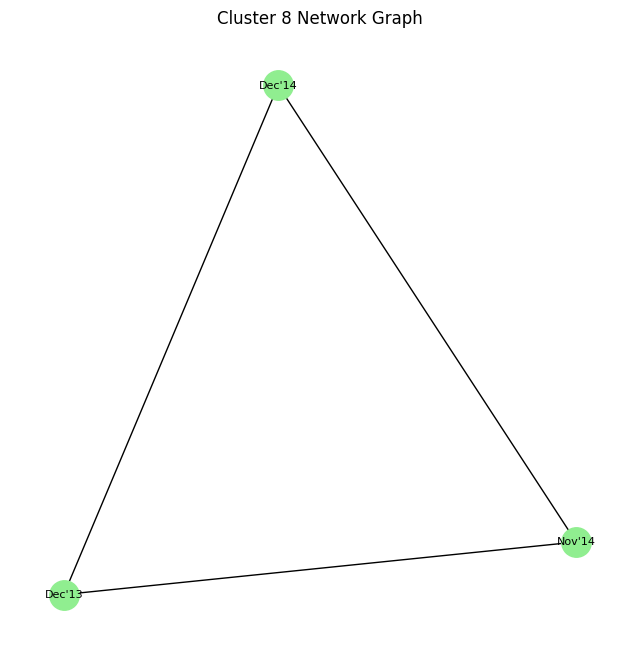

In [136]:
import networkx as nx
G = nx.Graph()
import community
from community import community_louvain

for date in similar_dates_dict:
    G.add_node(date)

# Add edges (connections between similar dates) to the graph
for date, similar_list in similar_dates_dict.items():
    for similar_date in similar_list:
        G.add_edge(date, similar_date)

# Detect clusters using the Louvain method
partition = community_louvain.best_partition(G)

# Get a list of unique cluster IDs
unique_clusters = set(partition.values())

subgraphs = {}

# Iterate over unique cluster IDs and create subgraphs
for cluster_id in unique_clusters:
    # Get nodes belonging to the current cluster
    cluster_nodes = [node for node, cluster in partition.items() if cluster == cluster_id]

    # Create a subgraph from the main graph G based on the cluster nodes
    subgraph = G.subgraph(cluster_nodes)

    # Store the subgraph in the dictionary with the cluster ID as the key
    subgraphs[cluster_id] = subgraph

# Draw and save the overall graph
plt.figure(figsize=(8, 8))  # Set the figure size
pos = nx.spring_layout(G, seed=42, k=0.01)  # Adjust node positioning
node_size = 450  # Node size
node_color = 'lightgreen'
font_size = 8  # Font size
font_color = 'black'
font_weight = 'normal'  # Font weight
edge_labels = {(date1, date2): '' for date1, date2 in G.edges()}

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=font_size, font_color=font_color, font_weight=font_weight)

# Adjust edge label position
label_pos = {k: (v[0], v[1] - 0.05) for k, v in pos.items()}
nx.draw_networkx_edge_labels(G, label_pos, edge_labels=edge_labels)

# Add a title and turn off axis
plt.title('Overall Network Graph')
plt.axis('off')

# Save or display the overall graph
# plt.savefig('overall_graph.png')  # Save the overall graph as an image
plt.show()  # Display the overall graph

# Create subgraphs for each cluster and draw them
for cluster_id, subgraph in subgraphs.items():
    plt.figure(figsize=(8, 8))  # Set the figure size
    pos = nx.spring_layout(subgraph, seed=42, k=0.15)  # Adjust node positioning
    node_size = 450  # Node size
    node_color = 'lightgreen'
    font_size = 8  # Font size
    font_color = 'black'
    font_weight = 'normal'  # Font weight
    edge_labels = {(date1, date2): '' for date1, date2 in subgraph.edges()}

    # Draw nodes and edges
    nx.draw_networkx_nodes(subgraph, pos, node_size=node_size, node_color=node_color)
    nx.draw_networkx_edges(subgraph, pos)
    nx.draw_networkx_labels(subgraph, pos, font_size=font_size, font_color=font_color, font_weight=font_weight)

    # Adjust edge label position
    label_pos = {k: (v[0], v[1] - 0.05) for k, v in pos.items()}
    nx.draw_networkx_edge_labels(subgraph, label_pos, edge_labels=edge_labels)

    # Add a title and turn off axis
    plt.title(f'Cluster {cluster_id} Network Graph')
    plt.axis('off')

    # Save or display the subgraph
    # plt.savefig(f'cluster_{cluster_id}_graph.png')  # Save the subgraph as an image
    plt.show()  # Display the subgraph



In [234]:
clusters = []
for cluster_id in unique_clusters:
    # Get nodes belonging to the current cluster
    cluster_nodes = [node for node, cluster in partition.items() if cluster == cluster_id]
    print(cluster_nodes)
    for nodes in cluster_nodes:
      for index, value in data_pre["Formatted_Date"].iteritems():
        if nodes == value:
          data_pre["Cluster_ID"][index] = cluster_id


["Mar'14", "Apr'14", "Feb'18", "Dec'17"]
["Mar'10", "Apr'10", "May'10", "Feb'11", "Apr'11", "May'11", "Dec'11", "May'12", "Nov'12", "May'13", "Nov'13", "Dec'15", "Apr'16", "Dec'16", "Nov'17", "Dec'19"]
["Dec'20", "Jan'21"]
["Jun'10", "Aug'10", "Oct'10", "Nov'10", "Jul'11", "Aug'11", "Sep'11", "Jun'12", "Jul'12", "Aug'12", "Aug'13", "Sep'13", "Sep'14", "Oct'14", "Jul'15", "May'16", "Jun'16", "Aug'16", "Mar'17", "Jul'17", "Sep'17", "Jun'19", "Nov'22"]
["Jul'10", "Jun'11", "Jun'13", "Jul'13", "Jun'14", "Jul'14", "Aug'14", "Jun'15", "Jul'16", "Jun'17", "Aug'17", "May'18", "Jun'18", "Jul'18", "Aug'18", "Oct'18", "Jul'19", "Aug'19", "Sep'19", "Oct'19", "Apr'20", "Jun'20", "Jul'20", "Aug'20", "Sep'20", "Oct'20", "May'21", "Jun'21", "Jul'21", "Aug'21", "Sep'21", "Oct'21", "Nov'21", "May'22", "Jun'22", "Jul'22", "Aug'22", "Sep'22", "Oct'22"]
["Sep'10", "Oct'11", "Nov'11", "Apr'12", "Sep'12", "Oct'12", "Apr'13", "Oct'13", "May'14", "Apr'15", "May'15", "Aug'15", "Sep'15", "Oct'15", "Nov'15", "May

<ipython-input-234-1054fde95e73>:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data_pre["Formatted_Date"].iteritems():
<ipython-input-234-1054fde95e73>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pre["Cluster_ID"][index] = cluster_id


In [66]:
data_pre['Formatted_Date'] = data_pre['Date'].dt.strftime("%b'%y")

In [233]:
data_pre = data_pre.assign(Cluster_ID=None)

In [235]:
data_pre

,Date,Rain,T_max,T_min,Kerala_Trends,Kerala_Tourism,Kerala_Weather,Kerala_Travel,Recreation,Geographic_Reference,Travel,Hotel,Air Travel,Bus & Rail,Car & Taxi Rental,Tourist Destinations,Travel Agencies,Tourist Arrivals,Formatted_Date,Cluster_ID
0,2010-01-01,-0.866119,-0.828886,-1.848258,3.040989,2.547672,-0.891865,2.468694,0,3.040989,2.460477,3.003711,0.085313,1.975207,5,2.130383,2.575467,94966.000,Jan'10,6
1,2010-02-01,-0.814907,0.659512,-1.413850,2.161667,2.756409,-0.793260,1.785864,0,2.161667,1.778408,1.901172,-0.809393,1.617018,4,1.556252,2.698937,94185.000,Feb'10,6
2,2010-03-01,-0.636138,1.586710,0.040471,3.627204,3.034726,-0.300238,2.810109,0,3.627204,2.801511,2.881206,0.980018,1.885659,3,2.048364,3.192819,66854.000,Mar'10,1
3,2010-04-01,-0.530310,1.830709,1.425539,1.722006,2.686830,-0.596051,2.297986,6,1.722006,2.289959,2.023676,-0.697555,1.975207,0,2.048364,2.451996,57215.000,Apr'10,1
4,2010-05-01,-0.460514,1.434210,0.500062,2.601328,3.243464,0.784411,3.151524,0,2.601328,3.142546,2.513694,0.420827,2.422943,14,2.868551,3.192819,28938.000,May'10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-08-01,2.822461,-0.488994,0.297275,0.109915,-0.861712,1.178829,-0.604042,1,0.109915,-0.608834,-0.916426,-0.138364,-0.442570,2,-0.822290,-0.881706,1050706.820,Aug'22,4
152,2022-09-01,0.659678,-0.358393,0.614708,-0.329746,-0.792133,0.192784,-0.518688,1,-0.329746,-0.523575,-0.793922,-0.473879,-0.442570,2,-0.576234,-0.758235,1142729.205,Sep'22,4
153,2022-10-01,0.379765,-0.635272,0.025236,-0.183192,-0.792133,0.192784,-0.347981,1,-0.183192,-0.438317,-0.671418,-0.026526,-0.173928,2,-0.412197,-0.758235,1289798.330,Oct'22,4
154,2022-11-01,-0.160682,-1.147610,-1.020302,-0.329746,-0.792133,0.291389,-0.006566,1,-0.329746,-0.097282,-0.671418,-0.473879,-0.621665,2,-0.494215,-0.758235,1299918.709,Nov'22,3


In [236]:
print("\nNone values in each column:")
print(data_pre.isna().any())


None values in each column:
Date                    False
Rain                    False
T_max                   False
T_min                   False
Kerala_Trends           False
Kerala_Tourism          False
Kerala_Weather          False
Kerala_Travel           False
Recreation              False
Geographic_Reference    False
Travel                  False
Hotel                   False
Air Travel              False
Bus & Rail              False
Car & Taxi Rental       False
Tourist Destinations    False
Travel Agencies         False
Tourist Arrivals        False
Formatted_Date          False
Cluster_ID              False
dtype: bool


In [107]:
for cluster_id in unique_clusters:
  nodes_not_in_clusters = [node for node, cluster in partition.items() if cluster is None]

# 'nodes_not_in_clusters' now contains a list of nodes not included in any cluster
print("Nodes not in any cluster:", nodes_not_in_clusters)

Nodes not in any cluster: []


In [113]:
dates = data_pre["Formatted_Date"].to_numpy()

In [117]:
for value in dates:
  if value not in partition:
    print(value)
    nodes_not_in_clusters.append(value)

Dec'10
Mar'11
Feb'13
Nov'16
Dec'17
Feb'19
Mar'19
Nov'19
Feb'20
Mar'20
Feb'21
Mar'21
Jan'22
Feb'22
Mar'22
Dec'22


In [119]:
nodes_not_in_clusters

["Dec'10",
 "Mar'11",
 "Feb'13",
 "Nov'16",
 "Dec'17",
 "Feb'19",
 "Mar'19",
 "Nov'19",
 "Feb'20",
 "Mar'20",
 "Feb'21",
 "Mar'21",
 "Jan'22",
 "Feb'22",
 "Mar'22",
 "Dec'22"]

In [156]:
sorted = []

In [175]:
for node in nodes_not_in_clusters:
  for index, value in data_pre['Formatted_Date'].iteritems():

      if node == value:
        sorted.append(np.argsort(similarities[index]))


<ipython-input-175-d6012d8ea009>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data_pre['Formatted_Date'].iteritems():


In [176]:
sorted

[array([127, 126, 138, 128, 115, 150, 151, 125,  41, 136, 102, 141, 139,
        137, 140,  54, 103, 101,  55,  42, 116,  65, 152, 148, 114, 142,
         53,   6, 129,  91, 117, 105, 149,  78, 100, 123, 153,  17,  89,
          5,  77,  92,  29,  43,  31,  57,  19,  90, 113,  56, 124,  30,
         86,  18,   9, 154,   7,  66,  76,  79, 111,  20, 147, 104,  44,
         63,  10, 130, 135,  45,  68,  67,  88, 106,  64,  69,  22,  93,
        143, 155,  33,  32,  70,  52,  39, 122,   8,  21, 132, 131, 118,
         27,  81, 134,  62,  74,  80,  87, 144, 112,  98, 121,  38, 107,
         99, 146, 110, 133, 145, 109, 108,  94,   4, 119,  75,   3,  13,
        120,  97,  28,  15,  85,  71,  34,  40,  73,  50,  95,  83,  49,
         51,  96,  48,  84,  82,  72,  61,  60,  37,  16,   2,  46,  25,
         36,  23,  26,  35,  24,  14,  59,  47,   0,  12,   1,  58,  11]),
 array([127, 138, 126, 115, 150, 128, 151, 125,  41, 102, 136, 141, 139,
        103,  54, 137, 140, 101,  55,  42, 116,  

In [206]:
clustering_node = [58,
24,
47,
47,
97,
109,
109,
155,
144,
135,
145,
146,
121,
133,
98,
118]

In [207]:
required_node = []

In [208]:
for node in clustering_node:
  for index, value in data_pre['Formatted_Date'].iteritems():

    if node == index:
      required_node.append(value)


<ipython-input-208-cd32db6a8ed1>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data_pre['Formatted_Date'].iteritems():


In [209]:
required_node

["Nov'14",
 "Jan'12",
 "Dec'13",
 "Dec'13",
 "Feb'18",
 "Feb'19",
 "Feb'19",
 "Dec'22",
 "Jan'22",
 "Apr'21",
 "Feb'22",
 "Mar'22",
 "Feb'20",
 "Feb'21",
 "Mar'18",
 "Nov'19"]

In [210]:
nnew ={}

In [211]:
for item in partition:
  for i in range (0,16):
    nnew[nodes_not_in_clusters[i]] = partition[required_node[i]]

In [212]:
nnew

{"Dec'10": 8,
 "Mar'11": 6,
 "Feb'13": 8,
 "Nov'16": 8,
 "Dec'17": 0,
 "Feb'19": 7,
 "Mar'19": 7,
 "Nov'19": "Dec'22",
 "Feb'20": "Jan'22",
 "Mar'20": 5,
 "Feb'21": "Feb'22",
 "Mar'21": "Mar'22",
 "Jan'22": "Nov'19",
 "Feb'22": "Feb'21",
 "Mar'22": 7,
 "Dec'22": "Mar'19"}

In [213]:
nnew["Dec'22"]=7
nnew["Nov'19"]=7
nnew["Jan'22"]=7
nnew["Feb'20"]=7
nnew["Mar'21"]=7

In [214]:
nnew

{"Dec'10": 8,
 "Mar'11": 6,
 "Feb'13": 8,
 "Nov'16": 8,
 "Dec'17": 0,
 "Feb'19": 7,
 "Mar'19": 7,
 "Nov'19": 7,
 "Feb'20": 7,
 "Mar'20": 5,
 "Feb'21": "Feb'22",
 "Mar'21": 7,
 "Jan'22": 7,
 "Feb'22": "Feb'21",
 "Mar'22": 7,
 "Dec'22": 7}

In [215]:
nodesnotinclusters2 = ["Feb'21",
 "Feb'22"]

In [ ]:
clustering2 = [58,
24,
47,
47,
97,
110,
109,
155,
144,
135,
145,
146,
121,
133,
98,
118]

In [220]:
for node in nodesnotinclusters2:
  for index, value in data_pre['Formatted_Date'].iteritems():

      if node == value:
        sorted.append(np.argsort(similarities[index]))

<ipython-input-220-546445702e95>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data_pre['Formatted_Date'].iteritems():


In [217]:
sorted = []

In [221]:
sorted

[array([127, 138, 115, 150, 126, 128, 151,  41, 102, 125,  54, 141,  55,
        139, 136, 101, 103,  42, 137, 140,  65, 116,   6, 152, 148,  91,
         53,  17, 114,   5,  78, 100, 117, 142, 149, 153, 105,  89,  29,
         77,  92,  31, 129,  43,  19,  57,  56, 123,   9,  90,   7,  18,
         30, 113,  20,  10,  66,  86,  76,  79, 154,  44,  63,  45, 124,
        111, 147,  68,  22,  67,  69,  64,   8, 104,  33,  88,  93,  32,
         21, 130,  70, 106,  52,  39, 155, 135, 143,  27,  81, 118,  62,
         80, 122, 132,  74,   4,   3, 131,  87,   0,  38,   1,  13,   2,
         12,  15,  11,  98,  35,  34,  71,  99,  36,  16,  28,  23,  60,
        112,  24, 107, 121,  14, 144, 134,  59,  25,  46,  94,  40,  26,
         96,  48,  58,  83,  61, 146,  75,  47,  84,  37, 119,  95,  72,
         49, 108, 120,  85,  73,  51,  82, 110,  97,  50, 109, 145, 133]),
 array([127, 138, 115, 150, 126, 128, 151,  41, 102, 125,  54, 141,  55,
        136, 139, 101, 103,  42, 140, 137,  65, 1

In [222]:
clustering2 = [109,120]

In [225]:
for node in clustering2:
  for index, value in data_pre['Formatted_Date'].iteritems():

    if node == index:
      required2.append(value)


<ipython-input-225-2a63cd36022f>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in data_pre['Formatted_Date'].iteritems():


In [224]:
required2 = []

In [226]:
required2

["Feb'19", "Jan'20"]

In [227]:
nnew2 = {}

In [229]:
for item in partition:
  for i in range (0,2):
    nnew2[nodesnotinclusters2[i]] = partition[required2[i]]

In [230]:
nnew2

{"Feb'21": 7, "Feb'22": 6}

In [231]:
partition.update(nnew)
partition.update(nnew2)

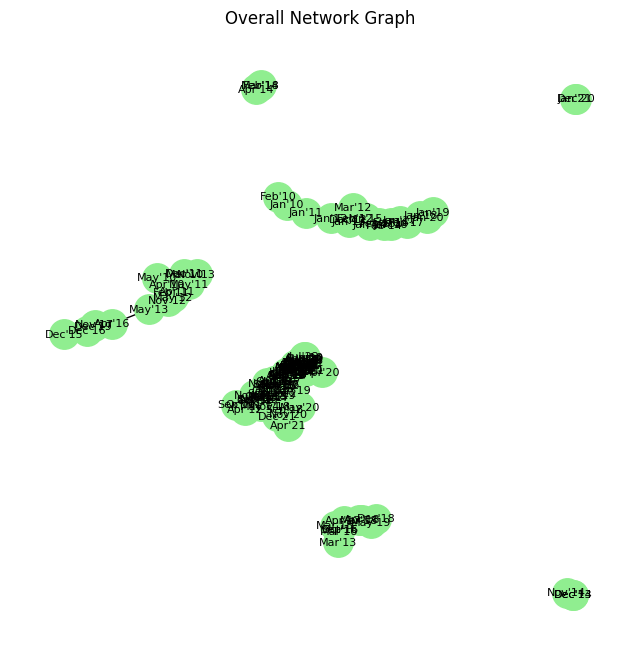

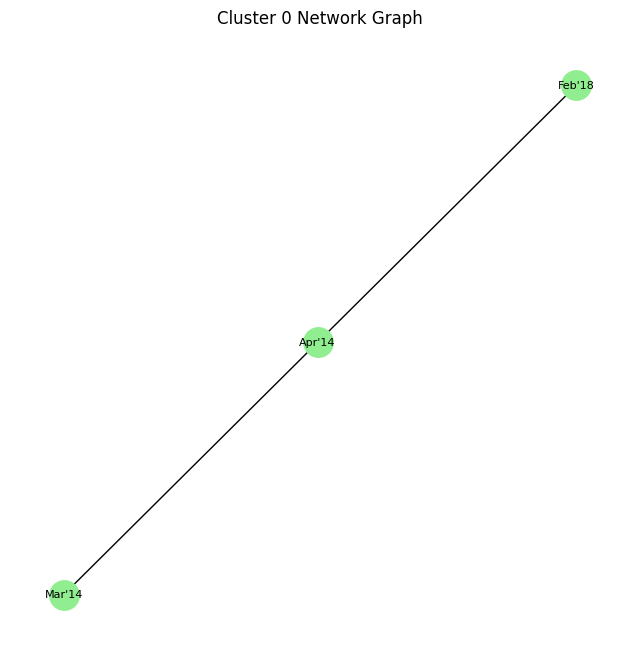

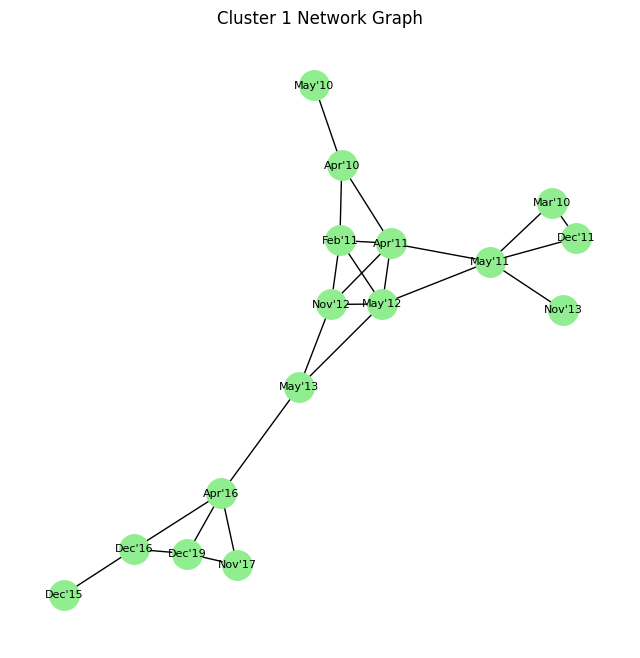

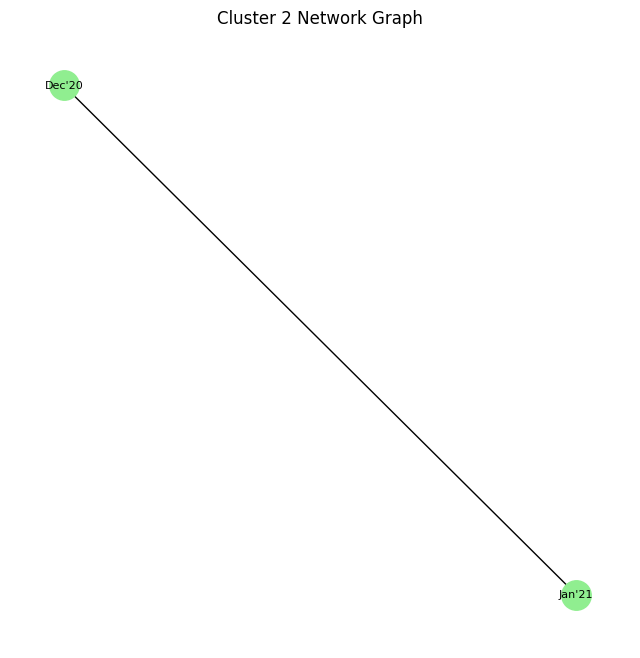

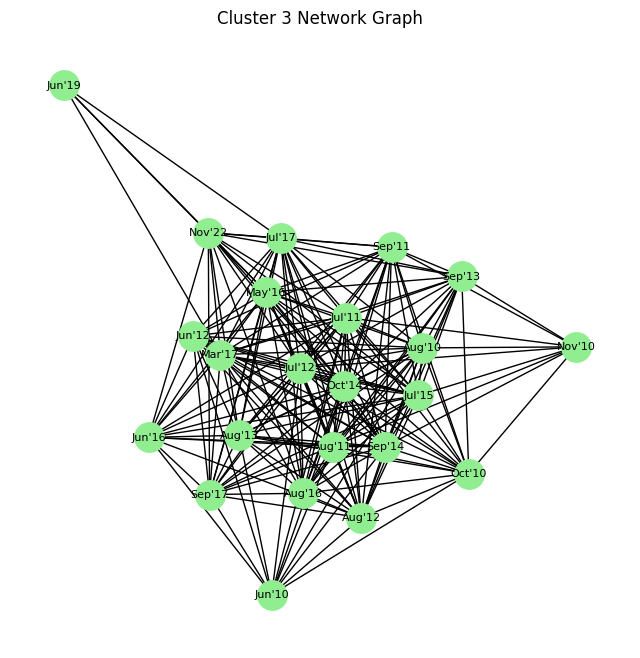

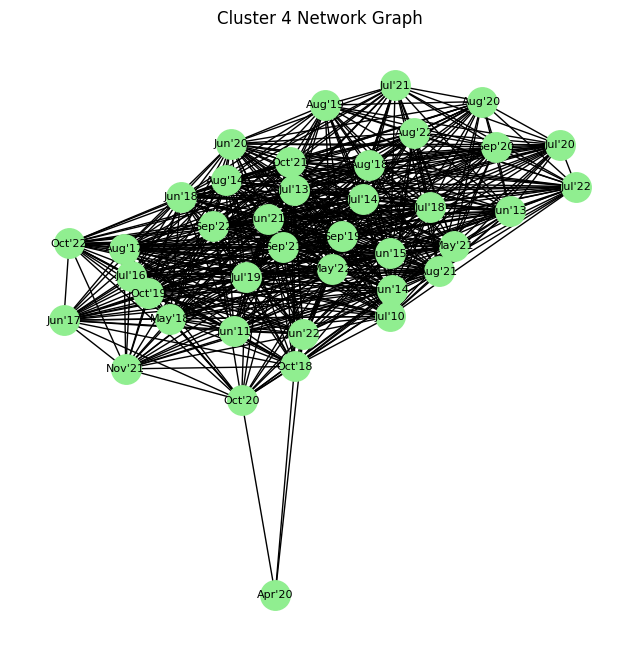

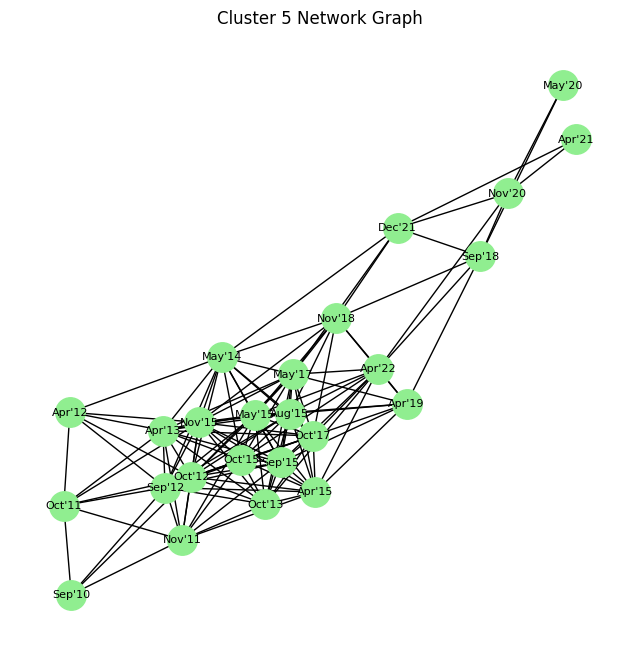

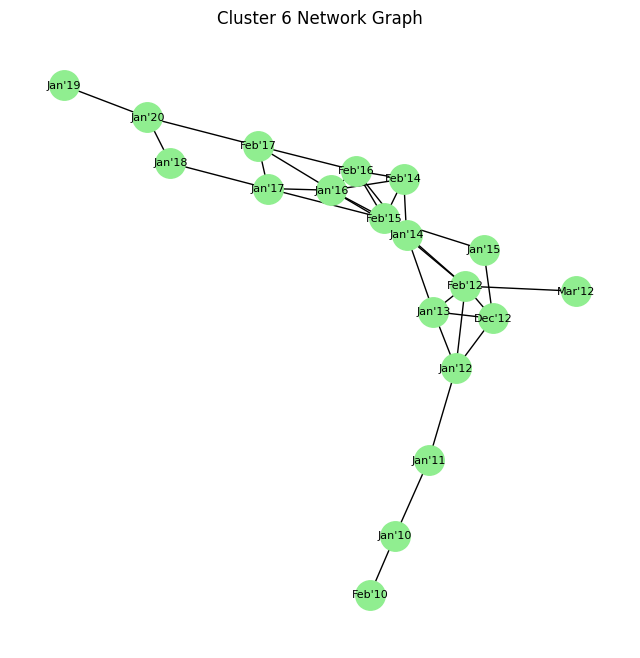

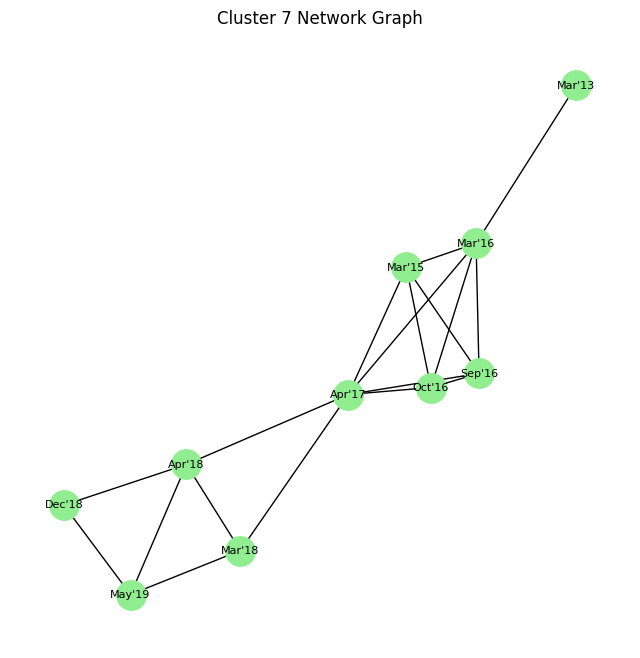

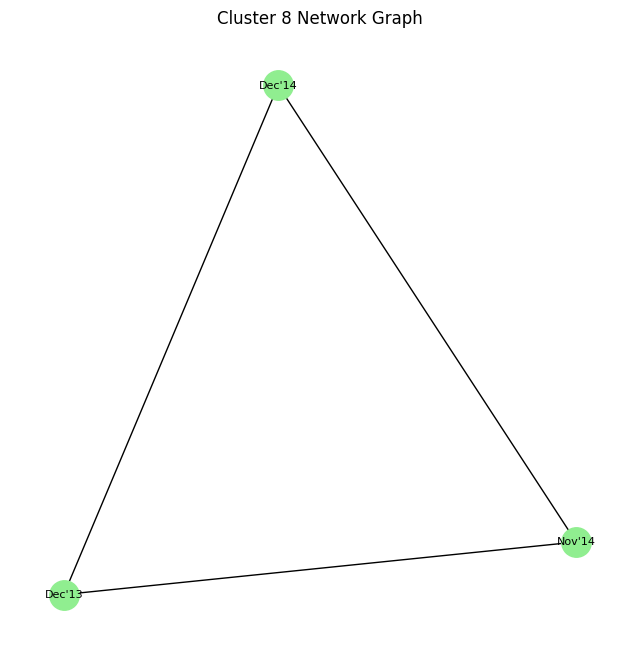

In [232]:
unique_clusters = set(partition.values())

subgraphs = {}

# Iterate over unique cluster IDs and create subgraphs
for cluster_id in unique_clusters:
    # Get nodes belonging to the current cluster
    cluster_nodes = [node for node, cluster in partition.items() if cluster == cluster_id]

    # Create a subgraph from the main graph G based on the cluster nodes
    subgraph = G.subgraph(cluster_nodes)

    # Store the subgraph in the dictionary with the cluster ID as the key
    subgraphs[cluster_id] = subgraph

# Draw and save the overall graph
plt.figure(figsize=(8, 8))  # Set the figure size
pos = nx.spring_layout(G, seed=42, k=0.01)  # Adjust node positioning
node_size = 450  # Node size
node_color = 'lightgreen'
font_size = 8  # Font size
font_color = 'black'
font_weight = 'normal'  # Font weight
edge_labels = {(date1, date2): '' for date1, date2 in G.edges()}

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=font_size, font_color=font_color, font_weight=font_weight)

# Adjust edge label position
label_pos = {k: (v[0], v[1] - 0.05) for k, v in pos.items()}
nx.draw_networkx_edge_labels(G, label_pos, edge_labels=edge_labels)

# Add a title and turn off axis
plt.title('Overall Network Graph')
plt.axis('off')

# Save or display the overall graph
# plt.savefig('overall_graph.png')  # Save the overall graph as an image
plt.show()  # Display the overall graph

# Create subgraphs for each cluster and draw them
for cluster_id, subgraph in subgraphs.items():
    plt.figure(figsize=(8, 8))  # Set the figure size
    pos = nx.spring_layout(subgraph, seed=42, k=0.15)  # Adjust node positioning
    node_size = 450  # Node size
    node_color = 'lightgreen'
    font_size = 8  # Font size
    font_color = 'black'
    font_weight = 'normal'  # Font weight
    edge_labels = {(date1, date2): '' for date1, date2 in subgraph.edges()}

    # Draw nodes and edges
    nx.draw_networkx_nodes(subgraph, pos, node_size=node_size, node_color=node_color)
    nx.draw_networkx_edges(subgraph, pos)
    nx.draw_networkx_labels(subgraph, pos, font_size=font_size, font_color=font_color, font_weight=font_weight)

    # Adjust edge label position
    label_pos = {k: (v[0], v[1] - 0.05) for k, v in pos.items()}
    nx.draw_networkx_edge_labels(subgraph, label_pos, edge_labels=edge_labels)

    # Add a title and turn off axis
    plt.title(f'Cluster {cluster_id} Network Graph')
    plt.axis('off')

    # Save or display the subgraph
    # plt.savefig(f'cluster_{cluster_id}_graph.png')  # Save the subgraph as an image
    plt.show()  # Display the subgraph

In [237]:
alpha = data_pre["Cluster_ID"].to_numpy

In [239]:
print(alpha)

<bound method IndexOpsMixin.to_numpy of 0      6
1      6
2      1
3      1
4      1
      ..
151    4
152    4
153    4
154    3
155    7
Name: Cluster_ID, Length: 156, dtype: object>


In [240]:
data_pre.to_csv("datapre.csv")